# Deciding Maximality

Non-uniform (hybrid) finite cellular automata (CAs) under null boundary condition
share a very special property which the classical finite CAs or the non-uniform finite
CAs under periodic boundary condition do not. This property is the maximality in
cycle length, which means, the presence of a cycle of length $2^n − 1$ in an n-cell binary
automaton. This property was first observed by Pries et. al. The maximal length
CAs are reversible CAs.

*A finite CA is a maximal length CA if all but one configuration of it
are in a single cycle.*

Hybrid rule vectors consisting of only rules 90 and 150 produces maximal length CA. This is a very generic algorithm to determine maximality, which takes exponential runtime. This is based upon [Exhaustive Search] and a experimental approach.

In [17]:
generate_binary_strings = lambda n: [format(i, f'0{n}b') for i in range(2**n)]

def decideMaximality(n_input,index_set):
    
    # the index_set takes the rule vector by only including the index of cells following rule 90
    # for example index_set = {0,2,4} means [90,150,90,150,90], index_set = {1,3,4} means [150,90,150,90,90]

    rule_90 = {}
    rule_150  = {}
    r_90 = f'{90:0{8}b}'
    r_150 = f'{150:0{8}b}'
    for i,key in enumerate(generate_binary_strings(3)[::-1]):
        rule_90[key] = r_90[i]
        rule_150[key] = r_150[i]
    

    current = f'{1:0{n_input}b}'             #started with ...00001

    rule_vector = [90 if i in index_set else 150 for i in range(n_input)]

    print("The rule vector is",rule_vector,"and the cell length is",n_input)
    
    have = current
    new = '0'*(n_input+1)
    periodicity = 0
    store = {}
    while have!=new:
        
        exec = '0' + current + '0'
        new = ''
        for i in range(len(exec)-2):
            if i in index_set:
                new += rule_90[exec[i:i+3]]
            if i not in index_set:
                new += rule_150[exec[i:i+3]]
        if new in store:
            
            if new!=f'{1:0{n_input}b}':
                return 'not cyclic thus not maximal'
                
        current = new
        store[new] = periodicity
        periodicity += 1
    else:
        if periodicity == 2**n_input-1:
            for key in store.keys():
                print(key)
            print("periodicity is",periodicity)
            return "maximal-length CA"
        else:
            return "Not a maximal_length CA"



In [24]:
decideMaximality(4,{0,2,3})

The rule vector is [90, 150, 90, 90] and the cell length is 4


'Not a maximal_length CA'

In [75]:
decideMaximality(4,{2})

The rule vector is [150, 150, 90, 150] and the cell length is 4
0011
0110
1011
1010
1001
1111
0100
1110
0111
1000
1100
0010
0101
1101
0001
periodicity is 15


'maximal-length CA'

In [76]:
decideMaximality(4,{2,3})

The rule vector is [150, 150, 90, 90] and the cell length is 4


'not cyclic thus not maximal'

# Non Palindromic Maximal Length CA
Given a cellular automaton of length $n$, there can be $2^n$ rule vectors consisting a sequence of rule number 90 and 150. A palindromic rule vectors can not produce a primitive polynomial and thus a maximal length cellular automaton. It has been shown
that the characteristic polynomials of an even length palindromic CA is the perfect
square, and of an odd length palindromic CA is the product of a monomial and a
perfect square. That means, the characteristic polynomial of a palindromic CA is
always reducible. The number of palindromic rule vectors of cellular automaton of length $n$ is 
\begin{cases} 
2^\frac{n}{2} & \text{if n is even }\\
2^\frac{n+1}{2} & \text{if n is odd} 
\end{cases}



Now, we will take the set of all non-palindromic (non-symmetric) rule vectors of length, and extract the maximal length CAs (in the below code). The runtime of this brute-force extractor is $O(2^{2n})$.

In [64]:
def genRulesVectors(n):

    # this output ['111', '110', '101', '100', '011', '010', '001', '000'], 
    generate_binary_strings = [format(i, f'0{3}b') for i in range(2**3)][::-1]

    
    # this generate all possible non-palindromic rules vectors
    rules_vectors = [bin(i)[2:].zfill(n) for i in range(2**n) if bin(i)[2:].zfill(n) != bin(i)[2:].zfill(n)[::-1]]   

    # this sets the rules of elementary cellular automata for 90 and 150
    rule_90 = {}
    rule_150  = {}
    r_90 = f'{90:0{8}b}'        # '01011010'
    r_150 = f'{150:0{8}b}'      # '10010110'
   
    generate_binary_strings = [format(i, f'0{3}b') for i in range(2**3)][::-1]   #['111', '110', '101', '100', '011', '010', '001', '000']

    for i,key in enumerate(generate_binary_strings):
        rule_90[key] = r_90[i]
        rule_150[key] = r_150[i]

    # check if a rule vectors produces maximal-length CA
    numMaxLenCA = 0
    for i in range(len(rules_vectors)):

        current = f'{1:0{n}b}'             #started with ...00001
        have = current
        new = '0'*(n+1)
        periodicity = 0
        store = {}
        while have!=new:
            
            exec = '0' + current + '0'
            new = ''
            for j in range(len(exec)-2):
                if rules_vectors[i][j] == '0':
                    new += rule_90[exec[j:j+3]]
                else:
                    new += rule_150[exec[j:j+3]]
            if new in store:
                
                if new!=f'{1:0{n}b}':
                    break
                    
            current = new
            store[new] = periodicity
            periodicity += 1
        else:
            if periodicity == 2**n-1:
                numMaxLenCA += 1
                print([90 if k=='0' else 150 for k in rules_vectors[i]])
                
    print("The total number of rule vectors producing maximal length CA are",numMaxLenCA)
    return numMaxLenCA
                

In [74]:
genRulesVectors(4)


[90, 150, 90, 150]
[150, 90, 150, 90]
[150, 90, 150, 150]
[150, 150, 90, 150]
The total number of rule vectors producing maximal length CA are 4


4

## Graph of number of maximal length CA versus n


In [ ]:
import io
import contextlib
import matplotlib.pyplot as plt

# Function to suppress print statements
def suppress_print(func, *args, **kwargs):
    with io.StringIO() as buf, contextlib.redirect_stdout(buf):
        return func(*args, **kwargs)
    
res = []

for i in range(1,14):
    res.append(suppress_print(genRulesVectors, i))

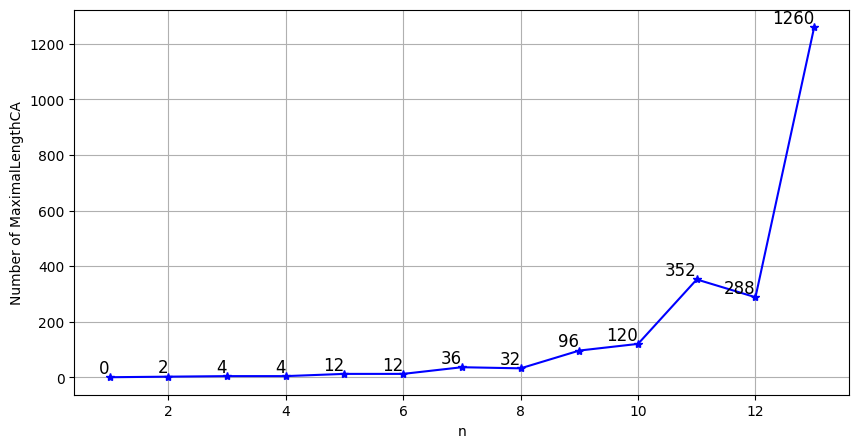

In [77]:
indices = list(range(1,14))

plt.figure(figsize=(10, 5))
plt.plot(indices, res, marker='*', linestyle='-', color='b')
plt.xlabel('n')
plt.ylabel('Number of MaximalLengthCA')

for i, value in enumerate(res):
    plt.text(indices[i], value, str(value), fontsize=12, ha='right', va='bottom')
plt.grid(True)
plt.show()